In [12]:
import pandas as pd
import matplotlib.pyplot as plt 

In [66]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



In [77]:
from sklearn import metrics

from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)

In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [26]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [52]:
df_dummied = pd.get_dummies(df, columns=["Sex"])
df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [53]:
df_dummied = pd.get_dummies(df_dummied, columns=["Embarked"])

In [54]:
df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [55]:
df_dummied.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

<AxesSubplot:>

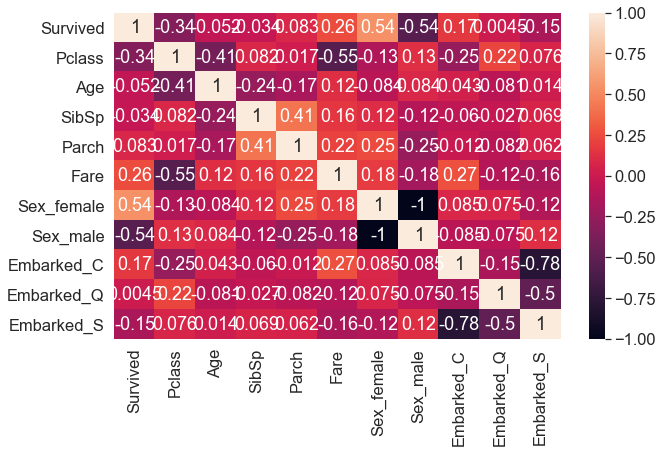

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df_dummied.corr(),annot= True) 

In [60]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Sex_female",
    "Sex_male",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

X = df_dummied[used_features].values
y = df_dummied['Survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [67]:
LogReg = LogisticRegression()

In [69]:
LogReg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred = LogReg.predict(X_test)

In [71]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [73]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  19],
       [ 23,  83]], dtype=int64)

In [74]:
metrics.accuracy_score(y_test, y_pred)

0.8426966292134831

In [75]:
len(X_test)

267

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       161
           1       0.81      0.78      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [79]:
LogReg.coef_

array([[-1.1779128 , -0.03913921, -0.24990984, -0.15455922,  1.19951906,
        -1.17298626,  0.2166905 ,  0.11622581, -0.30638351]])

In [80]:
LogReg.intercept_

array([3.92322828])

In [81]:
df_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [82]:
LogReg.predict_proba(X_test)

array([[0.36197982, 0.63802018],
       [0.93411643, 0.06588357],
       [0.54542569, 0.45457431],
       [0.48218069, 0.51781931],
       [0.84080657, 0.15919343],
       [0.84816656, 0.15183344],
       [0.56386937, 0.43613063],
       [0.14174086, 0.85825914],
       [0.0675576 , 0.9324424 ],
       [0.83294043, 0.16705957],
       [0.55523081, 0.44476919],
       [0.86218111, 0.13781889],
       [0.83294043, 0.16705957],
       [0.15717478, 0.84282522],
       [0.22818094, 0.77181906],
       [0.85081179, 0.14918821],
       [0.86489099, 0.13510901],
       [0.57177456, 0.42822544],
       [0.073681  , 0.926319  ],
       [0.91232302, 0.08767698],
       [0.40612496, 0.59387504],
       [0.63024565, 0.36975435],
       [0.87122161, 0.12877839],
       [0.806569  , 0.193431  ],
       [0.88383112, 0.11616888],
       [0.89045954, 0.10954046],
       [0.88383112, 0.11616888],
       [0.46731953, 0.53268047],
       [0.69257151, 0.30742849],
       [0.93502239, 0.06497761],
       [0.

# 1) Pclass   - Does a passenger's class on the boat affect their survivability?

In [85]:
x = df['Pclass']
y = df['Survived']

<BarContainer object of 889 artists>

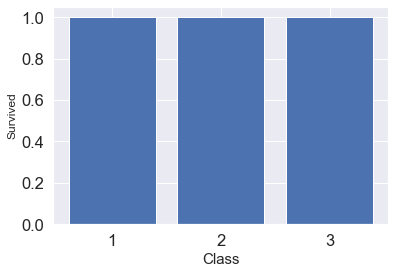

In [87]:
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Survived', fontsize = 12)

plt.bar(x,y)

In [98]:
df.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

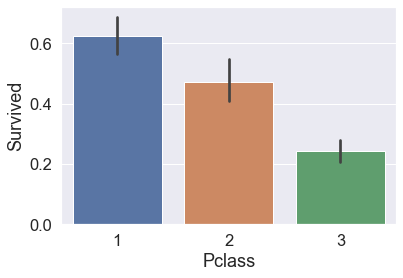

In [101]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df)

# 2) Sex      - Could a passenger's gender impact their survival rate?

In [91]:
x1 = df['Sex']
y1 = df['Survived']

<BarContainer object of 889 artists>

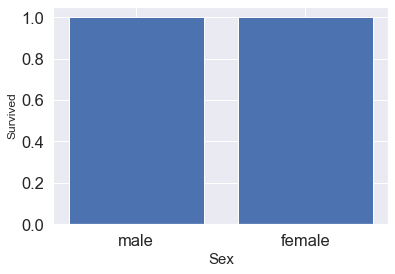

In [92]:
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Survived', fontsize = 12)

plt.bar(x1,y1)

In [97]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.740385
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

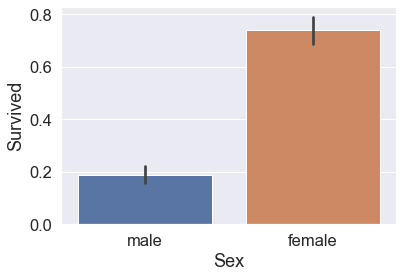

In [102]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)

# 3) Age      - Does a person's age impact their survival rate?

In [104]:
df.groupby('Age')[['Survived']].mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [168]:
bins = [0,18,40,60,80]

In [169]:
group = ['child','adult','old','senior citizen']

In [ ]:
df['Age_cat'] = pd.cut(df.Age, bins, labels = group)

In [170]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bins,Age_cat
0,0,3,male,22.0,1,0,7.2500,S,"(18, 40]",adult
1,1,1,female,38.0,1,0,71.2833,C,"(18, 40]",adult
2,1,3,female,26.0,0,0,7.9250,S,"(18, 40]",adult
3,1,1,female,35.0,1,0,53.1000,S,"(18, 40]",adult
4,0,3,male,35.0,0,0,8.0500,S,"(18, 40]",adult


In [171]:
df_dummied = pd.get_dummies(df, columns=["Age_cat"])
df_dummied.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bins,Age_cat_child,Age_cat_adult,Age_cat_old,Age_cat_senior citizen
0,0,3,male,22.0,1,0,7.2500,S,"(18, 40]",0,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,"(18, 40]",0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,"(18, 40]",0,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,"(18, 40]",0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,"(18, 40]",0,1,0,0


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

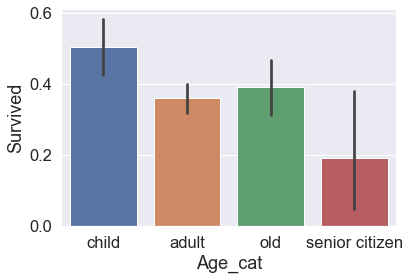

In [172]:
sns.barplot(x = 'Age_cat', y = 'Survived', data = df)

# 4) SibSp    - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability


In [118]:
df.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.343234
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

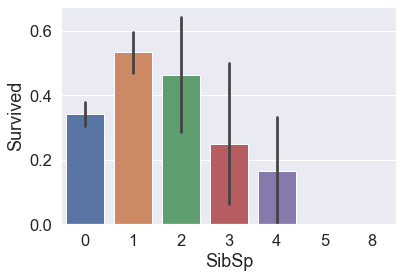

In [119]:
sns.barplot(x = 'SibSp', y = 'Survived', data = df)

# 5) Parch    - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability

In [120]:
df.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.341716
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

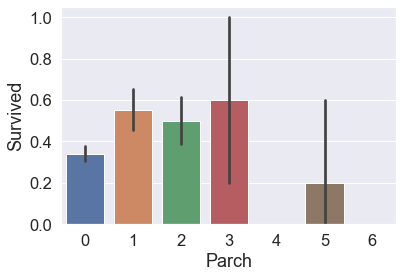

In [121]:
sns.barplot(x = 'Parch', y = 'Survived', data = df)

# 6) Fare     - Does the fare a person paid effect his survivability?

In [122]:
df.groupby('Fare')[['Survived']].mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


<AxesSubplot:xlabel='Fare', ylabel='Survived'>

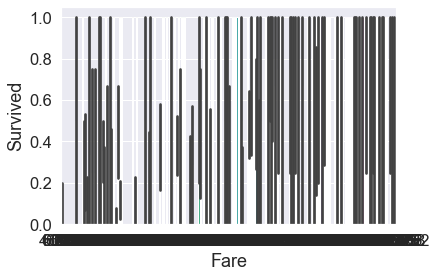

In [123]:
sns.barplot(x = 'Fare', y = 'Survived', data = df)

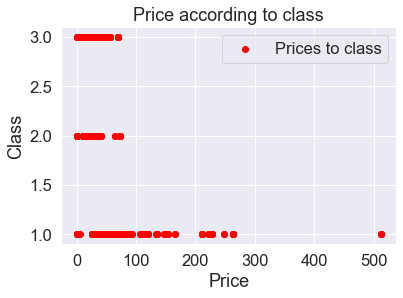

In [126]:
plt.scatter(df['Fare'], df['Pclass'], color = 'red', label = 'Prices to class')

plt.xlabel('Price')
plt.ylabel('Class')
plt.title('Price according to class')
plt.legend()
plt.show()

In [137]:
df.groupby('Pclass')[['Fare']].mean()

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [176]:
bins = [0,100,200,300,500]

In [177]:
group_name = ['afordable','cheap','nominal','expensive']

In [180]:
df['Fare_cat'] = pd.cut(df.Fare, bins, labels = group_name)

In [181]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bins,Age_cat,Fare_cat
0,0,3,male,22.0,1,0,7.2500,S,"(18, 40]",adult,afordable
1,1,1,female,38.0,1,0,71.2833,C,"(18, 40]",adult,afordable
2,1,3,female,26.0,0,0,7.9250,S,"(18, 40]",adult,afordable
3,1,1,female,35.0,1,0,53.1000,S,"(18, 40]",adult,afordable
4,0,3,male,35.0,0,0,8.0500,S,"(18, 40]",adult,afordable


In [182]:
df_dummied = pd.get_dummies(df, columns=["Fare_cat"])
df_dummied.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bins,Age_cat,Fare_cat_afordable,Fare_cat_cheap,Fare_cat_nominal,Fare_cat_expensive
0,0,3,male,22.0,1,0,7.2500,S,"(18, 40]",adult,1,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,"(18, 40]",adult,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,"(18, 40]",adult,1,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,"(18, 40]",adult,1,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,"(18, 40]",adult,1,0,0,0


<AxesSubplot:xlabel='Fare_cat', ylabel='Survived'>

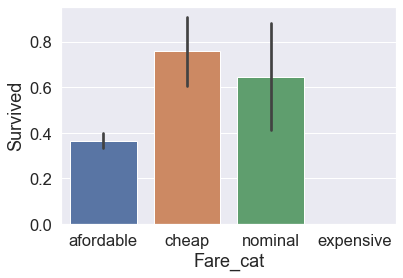

In [183]:
sns.barplot(x = 'Fare_cat', y = 'Survived', data = df)

# 7) Embarked - Does a person's point of embarkation matter? 

In [124]:
df.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

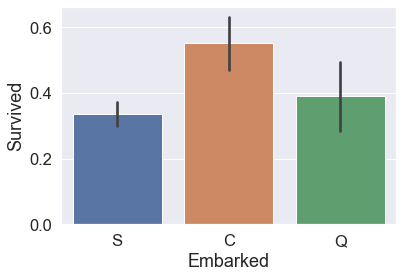

In [125]:
sns.barplot(x = 'Embarked', y = 'Survived', data = df)